### Logistic regression

#### the sigmoid function

- the ***sigmoid function*** is defined as: $f\left(x\right)=\frac{1}{1 +\,\exp{\left(-x\right)}}$


- the sigmoid function maps real values in the interval $(-\infty,\,+\infty)$ to the interval $\left(0, 1\right)$

    - $\text{for}\; x=-\infty\; \text{we have,}\; \exp{-\left(-\infty\right)}= \exp{\left(+\infty\right)}=\infty\,\Rightarrow f\left(-\infty\right)=\frac{1}{1 +\infty}=\frac{1}{\infty}=0$
    
    - $\text{for}; x=+\infty\; \text{we have,}\; \exp{-\left(+\infty\right)}= \exp{\left(-\infty\right)}=\frac{1}{\exp\left(+\infty\right)}=\frac{1}{\infty}=0\Rightarrow f\left(+\infty\right)=\frac{1}{1 +0}=1$
    
    
- with this mapping we can convert a numerical regression $x\in\left(-\infty, +\infty\right)$ into a probability $f\left(x\right)\in\left(0, 1\right)$

- therefore we can use logistic regression to solve a classification problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
x = np.linspace(-5, 5, 10000)

In [3]:
y = 1 /(1 + np.exp(-x))

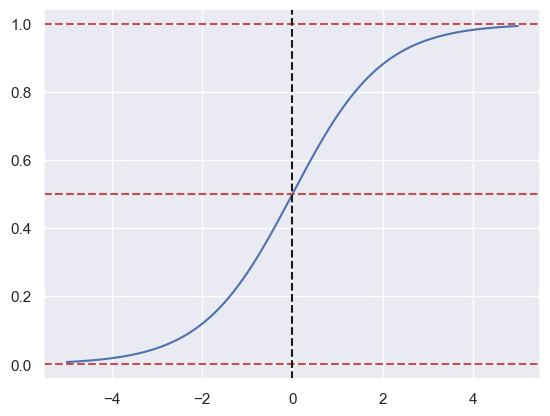

In [4]:
plt.plot(x, y)
plt.axhline(0, c = 'r', linestyle = '--')
plt.axhline(0.5, c = 'r', linestyle = '--')
plt.axhline(1, c = 'r', linestyle = '--')
plt.axvline(0, c = 'k', linestyle = '--')

#### example:
- predicting if a person would buy a life insurance based on his age

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('../Dades/regression/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


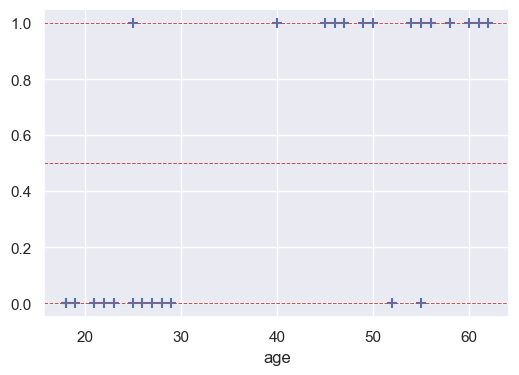

In [7]:
_, axs = plt.subplots(1, 1, figsize = (6, 4))
axs.scatter(df.age, df.bought_insurance, marker = '+', s = 50, color = 'b')
plt.axhline(0, c = 'r', linestyle = '--', linewidth = 0.7)
plt.axhline(0.5, c = 'r', linestyle = '--', linewidth = 0.7)
plt.axhline(1, c = 'r', linestyle = '--', linewidth = 0.7)
axs.set_xlabel('age');

#### build the model

- internally, the logistic regression performs two steps:

    - first, it builds a linear regression model like $y_{linear}=\beta_0+\beta_1\,x_{linear}$
    
    - second, it maps the result $y_{linear}$ into the interval $\left(0, 1\right)$ by making,
    
    $y_{logistic}=\frac{1}{1 +\exp\left(-y_{linear}\right)}=\frac{1}{1 +\exp{\left(-\left(\beta_0+\beta_1\,x_{linear}\right)\right)}}$

In [8]:
# independent variable
X = df.age.to_numpy().reshape(-1, 1)
# dependent variable
y = df.bought_insurance

In [9]:
model = LogisticRegression().fit(X, y)

In [10]:
# Coeficient
print('\u03B21: %.5f' % model.coef_)
# Intercept (x = 0)
print('\u03B20: %.5f' % model.intercept_)
# error
print('R^2:', model.score(X, y))

β1: 0.13547
β0: -5.26280
R^2: 0.8888888888888888


C:\Users\jaume\AppData\Local\Temp\ipykernel_3576\2572710785.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('\u03B21: %.5f' % model.coef_)
C:\Users\jaume\AppData\Local\Temp\ipykernel_3576\2572710785.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('\u03B20: %.5f' % model.intercept_)


- now we can make predict the probability of bying a life inssurance for any value of age

In [11]:
model.predict(np.array([[65]]))

array([1], dtype=int64)

- we can get a visualization of the model by making predictions for the whole range of the independent variable (age)

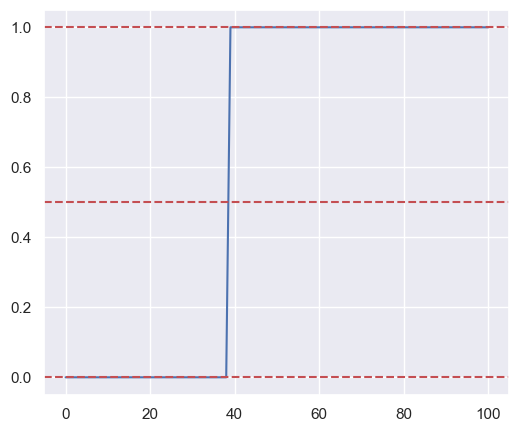

In [12]:
X = np.linspace(0, 100, 101).reshape(-1, 1)
Y = model.predict(X)
#
_, axs = plt.subplots(1, 1, figsize = (6, 5))
axs.plot(X, Y)
axs.axhline(0, c = 'r', linestyle = '--')
axs.axhline(0.5, c = 'r', linestyle = '--')
axs.axhline(1, c = 'r', linestyle = '--')

- the inflection point is the value of age at which the probability is 0.5

In [13]:
X = np.linspace(0, 100, 101).reshape(-1, 1)
Y = model.predict(X)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
# the probability changes abruptly from o to 1
# let's use higher precision to find the inflection point
X = np.linspace(0, 100, 10000).reshape(-1, 1)
Y = model.predict(X)
inflection = np.where(Y <= 0.5)[0][-1]
print('the inflection point is at age %5.2f for which the probability is %6.4f' %(X[inflection], Y[inflection]))

the inflection point is at age 38.84 for which the probability is 0.0000


C:\Users\jaume\AppData\Local\Temp\ipykernel_3576\1758277544.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the inflection point is at age %5.2f for which the probability is %6.4f' %(X[inflection], Y[inflection]))


- El model hauría de ser una més soft.
- Ara puja molt abruptament.
- És perquè hi ha poques dades i el model ho té clarrisim. 
- També perque tenim pocs atributs (només si o no).
- Busca les desviacions mínimes.
- El logistic, resolem el problema de solució binaria, amb les asumpsions de la variable independent, arriba un punt que canvia i això no té marxa enrrere. 
- En comptes de fer unic, podem fer regressio logistica multivariant, després si que ho podríem representar. 
- Els de 80 anys no compren quan tenen el sou baix, aquest model tindria una altre dimensió, les curves són diferents, sería la mateixa pero amb profunditat i pot baixar més de un costat que de l'altre per la dimensió sou. 

## Ara multivariant (nb58)

In [15]:
# Atribut catagoric a numeric
# 
# df[['age', 'estimated salary']].describe().T
# rangs diferents afecta al model, reescalar (normalitzar, posar rang entre 0 i 1) 
# i el estanderització = restar mitjana / dividir variança, standar escaled, posa 
# la mitjana a 0, les variançes les posa totes iguals a 1
# El model no es veurà afectat per això. 

In [16]:
df = pd.read_csv('../Dades/regression/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
# Convertir atributs numerics
# df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [19]:
# Train/test
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 53)

In [20]:
# Les dades estan molt separades en l'espai, molts rangs diferents, s'han de reescalar.
df[['Age', 'EstimatedSalary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.500,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0


In [21]:
# Les dades de test les hem d'escalar amb el que hem fitat amb les dades de train.
# Hem d'imaginar que les dades de test no tenim el resultat (com a producció).
# Per tant fem scaler de train i després reescalem el test amb aquest scaler.
# Resumint, no fem serivir les dades de test per fer l'objecte scaler

In [22]:
# Reescalem les variables
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [23]:
X_train.columns[[2, 3]]

Index(['Age', 'EstimatedSalary'], dtype='object')

In [24]:
X_train[['Age', 'EstimatedSalary']].head(2)

,Age,EstimatedSalary
281,35,61000
94,29,83000


In [25]:
scaler = s.fit(X_train[['Age', 'EstimatedSalary']])
scaler

# Per fer-ho directe: 
# X_train[['Age', 'EstimatedSalary']] = scaler.fit_transform(X_train[['Age', 'EstimatedSalary']])
# Però no l'estaríem guardant fer reescalar les variables de test.

StandardScaler()

In [26]:
X_train[['Age', 'EstimatedSalary']] = scaler.transform(X_train[['Age', 'EstimatedSalary']])

In [27]:
X_train.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
281,15685536,1,-0.216807,-0.189304,0
94,15786993,0,-0.790973,0.465908,0


In [28]:
X_train.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
281,15685536,1,-0.216807,-0.189304,0
94,15786993,0,-0.790973,0.465908,0
73,15782530,0,-0.408196,1.359378,0
166,15762228,0,-1.460833,-0.367998,0
360,15577514,1,0.548747,1.835896,1


In [29]:
predictors = X_train.columns[[1, 2, 3]]
predictors

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [30]:
to_predict = X_train.columns[[4]]
to_predict

Index(['Purchased'], dtype='object')

In [31]:
# variables dependents
X = X_train[predictors].to_numpy()
# variable independent
y = X_train[to_predict]

In [32]:
model = LogisticRegression().fit(X, y)

C:\Users\jaume\miniconda3\envs\entorn_1_Jaume\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print('R^2:', model.score(X, y))

R^2: 0.8625


In [34]:
X_test.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
161,15670619,1,25,90000,0
174,15644296,0,34,72000,0


In [35]:
# Reescalem el dataset de X_test: 
X_test[['Age', 'EstimatedSalary']] = scaler.transform(X_test[['Age', 'EstimatedSalary']])

In [36]:
# Fem la predicció: 
X_test['predicted'] = model.predict(X_test[predictors])

C:\Users\jaume\miniconda3\envs\entorn_1_Jaume\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [37]:
X_test.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,predicted
161,15670619,1,-1.173750,0.674384,0,0
174,15644296,0,-0.312502,0.138302,0,0
199,15708228,1,-0.216807,-1.350816,0,0
181,15774727,0,-0.599585,0.108519,0,0
363,15768293,0,0.453053,0.346778,0,0


In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context = 'notebook', style = "white", font_scale = 1.0)

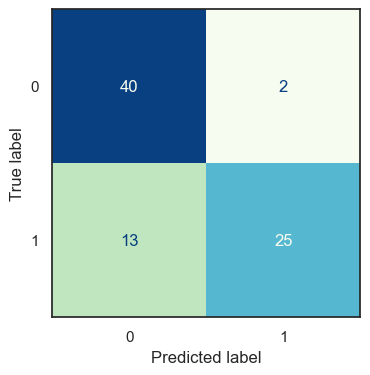

In [39]:
_, axs = plt.subplots(1, 1, figsize = (4, 4))
ConfusionMatrixDisplay.from_predictions(
    X_test.Purchased,
    X_test.predicted,
    ax = axs,
    colorbar = False,
    cmap = 'GnBu'
);